C:\Users\Vaishnavi\Anaconda3\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


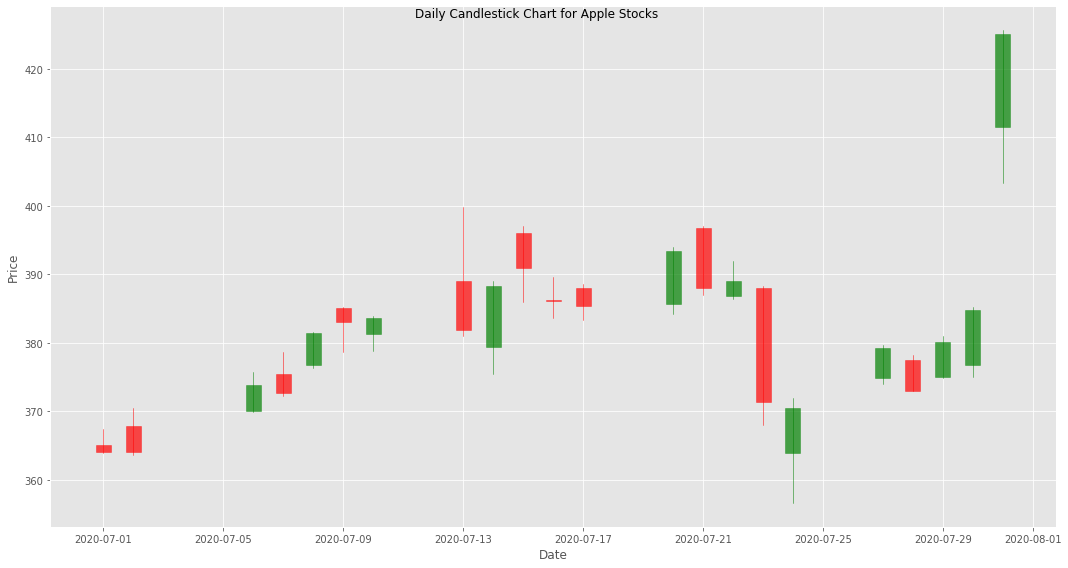

In [2]:
def plot_candlestick(data):
    # Arrange data in ohlc order
    data=data.loc[:,['Open','High','Low','Close']]
    data.reset_index(inplace=True)
    data['Date'] = data['Date'].map(mdates.date2num)


    # Creating Subplots
    fig, ax = plt.subplots(figsize=(15,8))
    ax.xaxis_date()
    ax.set_axisbelow(True)
    #ax.set_facecolor('white')

    # Setting labels & titles
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    fig.suptitle('Daily Candlestick Chart for Apple Stocks')

    # Candle stick plot - green-bullish and red- bearish
    candlestick_ohlc(ax,data.values,width=0.5, colorup='green', colordown='red', alpha=0.7)
    fig.tight_layout()
    plt.show()
    
# Libraries
import datetime as dt
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
plt.style.use('ggplot')

# Data reading
start =dt.datetime(2020,7,1)
end =dt.datetime(2020,8,1)

data1 = web.DataReader('AAPL','yahoo',start,end)

plot_candlestick(data1)

In [3]:
# Data reading
start2 =dt.datetime(2020,7,1) # 1/9/2019
end2 =dt.datetime(2020,8,1) # 1/12/2019

data2 = web.DataReader('AAPL','yahoo',start2,end2)

#plot_candlestick(data2)
data2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-01,367.359985,363.910004,365.119995,364.109985,27684300,363.454681
2020-07-02,370.470001,363.640015,367.850006,364.109985,28510400,363.454681
2020-07-06,375.779999,369.869995,370.000000,373.850006,29663900,373.177155
2020-07-07,378.619995,372.230011,375.410004,372.690002,28106100,372.019257
2020-07-08,381.500000,376.359985,376.720001,381.369995,29273000,380.683624
2020-07-09,385.269989,378.690002,385.049988,383.010010,31410700,382.320679
2020-07-10,383.920013,378.820007,381.339996,383.679993,22564300,382.989471
2020-07-13,399.820007,381.029999,389.059998,381.910004,47912300,381.222656
2020-07-14,389.019989,375.510010,379.359985,388.230011,42747300,387.531281


In [4]:
import datetime as dt
import pandas as pd
import numpy as np
import pandas_datareader as web


start=dt.datetime(2010,1,1)
end=dt.datetime(2020,5,1)

df=web.DataReader('AAPL','yahoo',start,end)

print(df.shape)

# Data Cleaning 
df.isna().any()

(2600, 6)


High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

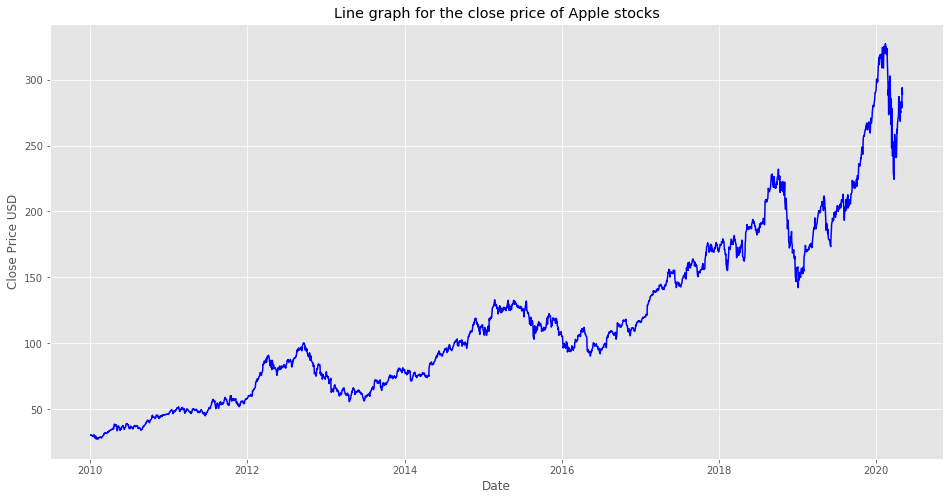

In [5]:
import matplotlib.pyplot as plt
# Plot of CLose price
plt.figure(figsize=(16,8))
plt.title("Line graph for the close price of Apple stocks")
plt.xlabel("Date")
plt.ylabel("Close Price USD")
plt.plot(df['Close'],'b')


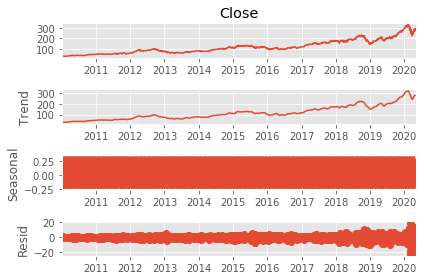

In [6]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df['Close'],period = 12,model='additive')
decomposition.plot()
plt.show()

In [7]:
# Statistical Analysis
from statistics import stdev
from scipy import stats 
print(np.min(df['Close']))
print(np.max(df['Close']))
print(np.mean(df['Close']))
print(np.median(df['Close']))
print(stdev(df['Close']))
print(stats.iqr(df['Close'], interpolation = 'midpoint'))

27.435714721679688
327.20001220703125
116.1061873113192
101.36999893188477
63.81666516196515
90.61999893188477


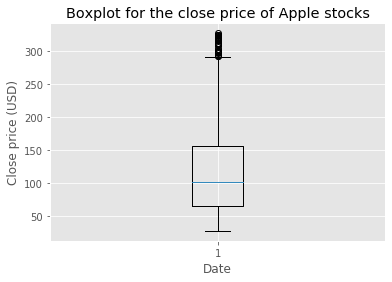

In [8]:
# Outliers
plt.boxplot(df['Close'])
plt.title("Boxplot for the close price of Apple stocks")
plt.xlabel("Date")
plt.ylabel("Close price (USD)")
plt.show()

Text(0.5, 1.0, 'Histogram for the close price of Apple stocks')

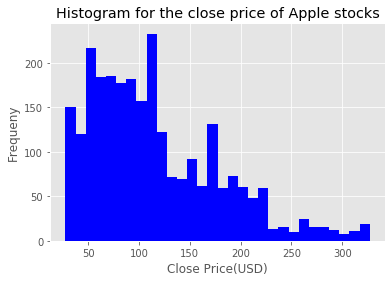

In [9]:
#hist = .hist(bins=30)
plt.hist(df['Close'], color = "blue",bins=30)
plt.xlabel("Close Price(USD)")
plt.ylabel("Frequeny")
plt.title("Histogram for the close price of Apple stocks")

In [46]:
# Importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Number of Future prediction days
pred_days = 520
df2 = df.filter(['Close'])
df2['Prediction'] = df[['Close']].shift(-pred_days)

# Create test and train data
x = df2.drop(['Prediction'],axis=1)[:-pred_days]
x = np.array(x)
y = np.array(df2['Prediction'])[:-pred_days]

#split into train and test - 80 % and 20 %
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 55)

In [47]:
#Using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Future prediction
x_test = df2.drop(['Prediction'],axis=1)[:-pred_days]
x_test = x_test.tail(pred_days)
x_test = np.array(x_test)


#Fit the model and make predictions
preds = model.predict(x_test)

# Actual Values
y_test = df2.drop(['Prediction'],axis=1).tail(pred_days)

# Root mean square error (RMSE)
y_test = np.array(y_test)
preds = np.array(preds)
RMSE = np.sqrt(np.mean(np.power((preds-y_test),2)))
print(RMSE)
MAE = mean_absolute_error(preds, y_test)
print(MAE)
MSE = mean_squared_error(preds, y_test)
print(MSE)
R2 = r2_score(preds,y_test)
print(R2)

66.71206515881674
23.116677838512977
913.0322237089736
0.6210206409611299


C:\Users\Vaishnavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


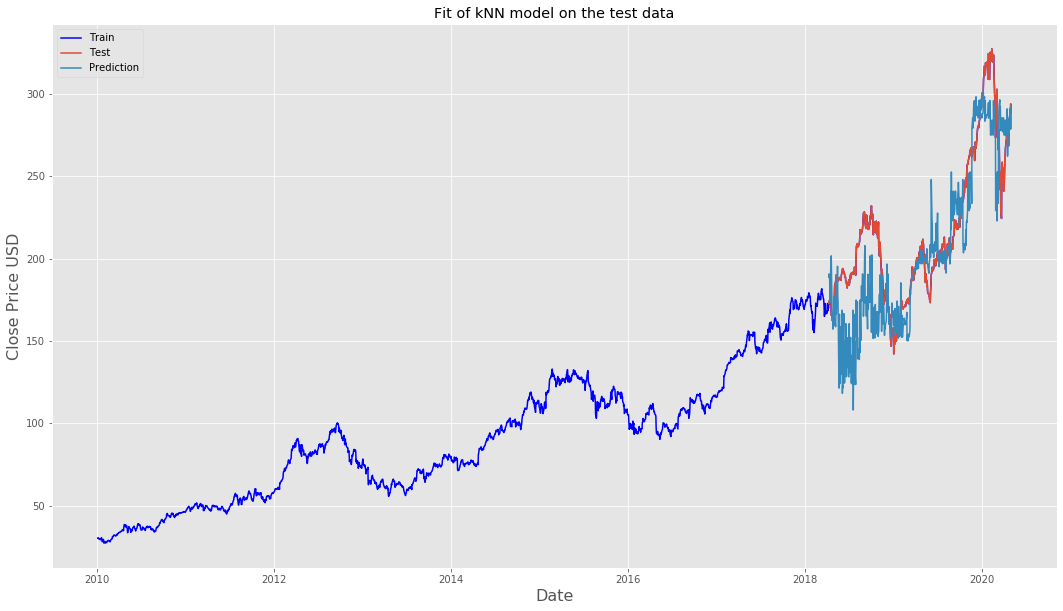

In [50]:
# Plot the datsets
test = df2[x.shape[0]:]
test['Prediction'] = preds

# Visualize the data
plt.figure(figsize=(18,10))
plt.title('Fit of kNN model on the test data')
plt.xlabel('Date',fontsize=16)
plt.ylabel("Close Price USD",fontsize=16)
plt.plot(df2['Close'],'b')
plt.plot(test.loc[:,['Close','Prediction']])
plt.legend(['Train','Test','Prediction'])
plt.show()

In [51]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

# Make predictions 
preds = regressor.predict(x_test)

# Actual Values
y_test = df2.drop(['Prediction'],axis=1).tail(pred_days)

# Root mean square error (RMSE)
y_test = np.array(y_test)
preds = np.array(preds)
RMSE = np.sqrt(np.mean(np.power((preds-y_test),2)))
print(RMSE)
MAE = mean_absolute_error(preds, y_test)
print(MAE)
MSE = mean_squared_error(preds, y_test)
print(MSE)
R2 = r2_score(preds,y_test)
print(R2)

65.56990623033695
36.47757527398229
2170.6016511133594
-0.6656811297444867


C:\Users\Vaishnavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


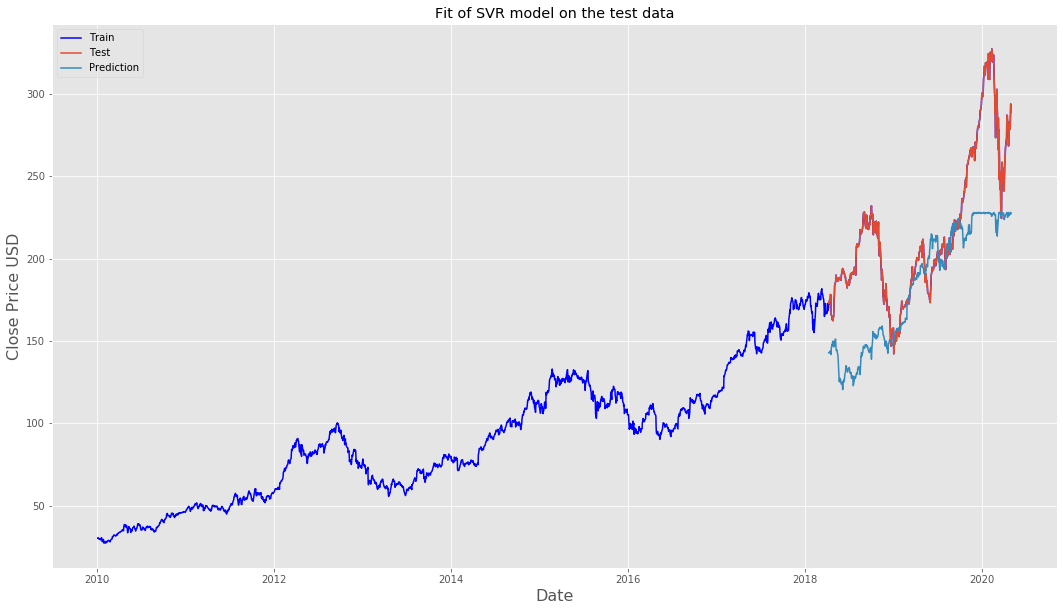

In [52]:
# Plot the datsets
test = df2[x.shape[0]:]
test['Prediction'] = preds

# Visualize the data
plt.figure(figsize=(18,10))
plt.title('Fit of SVR model on the test data')
plt.xlabel('Date',fontsize=16)
plt.ylabel("Close Price USD",fontsize=16)
plt.plot(df2['Close'],'b')
plt.plot(test[['Close','Prediction']])
plt.legend(['Train','Test','Prediction'])
plt.show()

In [53]:
# Linear model
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

# Make predictions 
preds = lr_model.predict(x_test)

# Actual Values
y_test = df2.drop(['Prediction'],axis=1).tail(pred_days)

# Root mean square error (RMSE)
y_test = np.array(y_test)
preds = np.array(preds)
RMSE = np.sqrt(np.mean(np.power((preds-y_test),2)))
print(RMSE)
MAE = mean_absolute_error(preds, y_test)
print(MAE)
MSE = mean_squared_error(preds, y_test)
print(MSE)
R2 = r2_score(preds,y_test)
print(R2)

61.03536421678718
30.19329482300031
1503.9552593934868
-0.15353926901324866


C:\Users\Vaishnavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


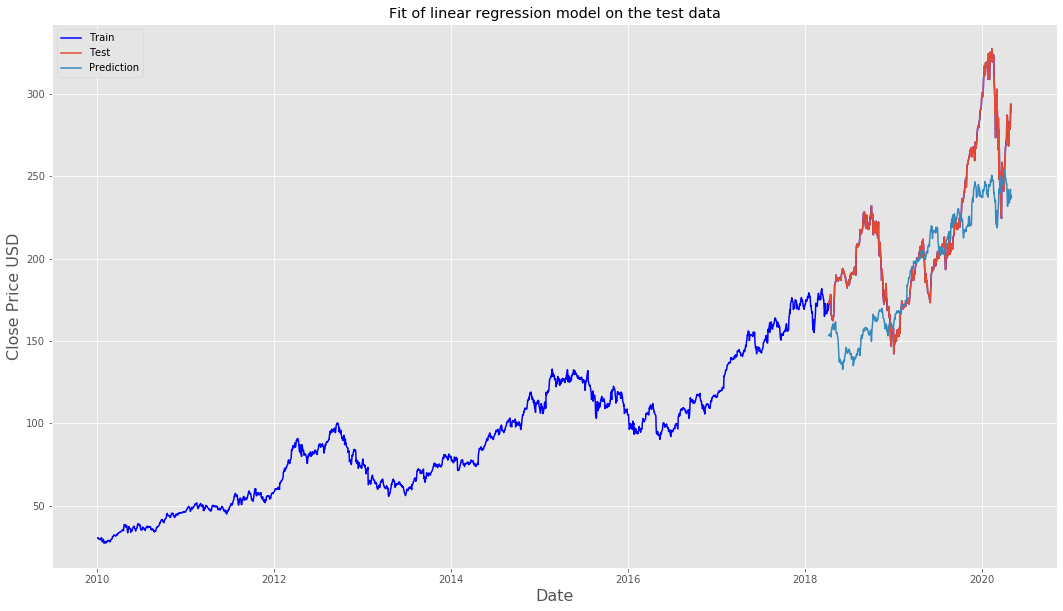

In [54]:
# Plot the datsets
test = df2[x.shape[0]:]
test['Prediction'] = preds

# Visualize the data
plt.figure(figsize=(18,10))
plt.title('Fit of linear regression model on the test data')
plt.xlabel('Date',fontsize=16)
plt.ylabel("Close Price USD",fontsize=16)
plt.plot(df2['Close'],'b')
plt.plot(test[['Close','Prediction']])
plt.legend(['Train','Test','Prediction'])
plt.show()

In [55]:
# Decision tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)

# Future prediction
x_test = df2.drop(['Prediction'],axis=1)[:-pred_days]
x_test = x_test.tail(pred_days)
x_test = np.array(x_test)

# Actual Values
y_test = df2.drop(['Prediction'],axis=1).tail(pred_days)

# Make predictions 
preds = tree.predict(x_test)

# Root mean square error (RMSE)
y_test = np.array(y_test)
preds = np.array(preds)
RMSE = np.sqrt(np.mean(np.power((preds-y_test),2)))
print(RMSE)
MAE = mean_absolute_error(preds, y_test)
print(MAE)
MSE = mean_squared_error(preds, y_test)
print(MSE)
R2 = r2_score(preds,y_test)
print(R2)

64.68022939678956
7.76966347572131
443.9462946119902
0.8061752271664379


In [46]:
#x_train = pd.DataFrame(x_train,columns=['Close'])
#plt.figure(figsize=(20,20))
#a = plot_tree(tree,feature_names= x_train.columns,filled = True,node_ids=True)
#x_train.columns

C:\Users\Vaishnavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


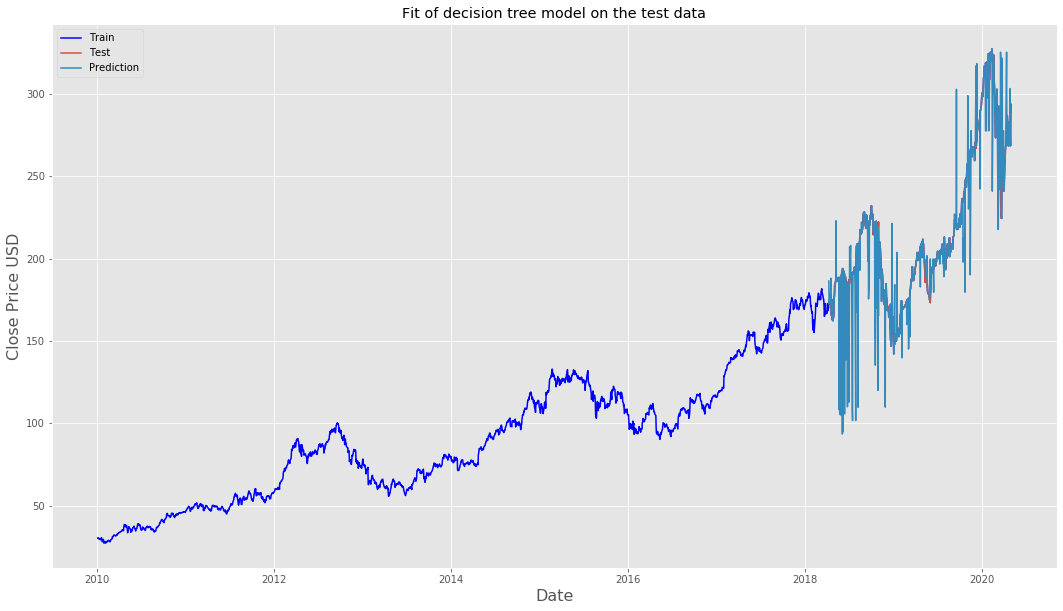

In [57]:
# Plot the datsets
test = df2[x.shape[0]:]
test['Prediction'] = preds

# Visualize the data
plt.figure(figsize=(18,10))
plt.title('Fit of decision tree model on the test data')
plt.xlabel('Date',fontsize=16)
plt.ylabel("Close Price USD",fontsize=16)
plt.plot(df2['Close'],'b')
plt.plot(test[['Close','Prediction']])
plt.legend(['Train','Test','Prediction'])
plt.show()


In [2]:
import datetime as dt
import pandas as pd
import numpy as np
import pandas_datareader as web


start=dt.datetime(2010,1,1)
end=dt.datetime(2020,5,1)

df=web.DataReader('AAPL','yahoo',start,end)

print(df.shape)

# Data Cleaning 
df.isna().any()

(2600, 6)


High         False
Low          False
Open         False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [1]:
# Import libraries
import math 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [3]:
# Pre-processing scaling
scaler = MinMaxScaler(feature_range=(0, 1))

# Take the Close price and convert into numpy arra
close_price = df.filter(['Close'])
df1 = np.array(close_price)

# Split the data - 70% and 30%
train_length = math.ceil(len(df1)*.7)
print(train_length)


1820


In [4]:
# Scaling the data
scaled_df = scaler.fit_transform(df1)
print(scaled_df)

[[0.01046536]
 [0.01064169]
 [0.0090166 ]
 ...
 [0.86832988]
 [0.88857904]
 [0.87280005]]


In [5]:
# Empty train data sets
x_train = []
y_train = []

# Create scaled train data
scaled_train = scaled_df[0:train_length,:]

# Split data into x_train and y_train datasets
for i in range(60, len(scaled_train)):
    x_train.append(scaled_train[i-60:i, 0])
    y_train.append(scaled_train[i, 0])


# create numpy array
x_train,y_train = np.array(x_train),np.array(y_train)

# Reshape the train 
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)



(1760, 60, 1)


In [6]:
# create x_test and y_test dataset
x_test = []
y_test = df1[train_length:,:]

# Creating test data and scaling it
scaled_test = scaled_df[train_length-60:,:]

# Split data into x_train and y_train datasets
for i in range(60, len(scaled_test)):
    x_test.append(scaled_test[i-60:i, 0])

# create numpy array
x_test = np.array(x_test)

# Reshape the test 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(780, 60, 1)


In [7]:
# LSTM prediction

model = Sequential()

# First LSTM layer and dropout regularisation 
model.add(LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

# Second LSTM layer and dropout regularisation
model.add(LSTM(60,return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer and dropout regularisation
model.add(LSTM(60,return_sequences=True))
model.add(Dropout(0.2))

# Fourth LSTM layer and dropout regularisation
model.add(LSTM(60,return_sequences=False))
model.add(Dropout(0.2))

#model.add(Dense(25))
model.add(Dense(1))


In [8]:
# Compiling the model
model.compile(optimizer='Adam',loss='mean_squared_error')

# Fitting the model
val = model.fit(x_train, y_train, batch_size=32, epochs=5)


Epoch 1/5
1760/1760 [==============================] - 15s 9ms/step - loss: 0.0034
Epoch 2/5
1760/1760 [==============================] - 13s 8ms/step - loss: 6.9162e-04
Epoch 3/5
1760/1760 [==============================] - 14s 8ms/step - loss: 5.6180e-04
Epoch 4/5
1760/1760 [==============================] - 13s 8ms/step - loss: 5.5155e-04
Epoch 5/5
1760/1760 [==============================] - 14s 8ms/step - loss: 4.7533e-04


In [9]:
# Prediction on test data 

preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)

plt.plot(val.history['loss'],'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()


NameError: name 'plt' is not defined

C:\Users\Vaishnavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


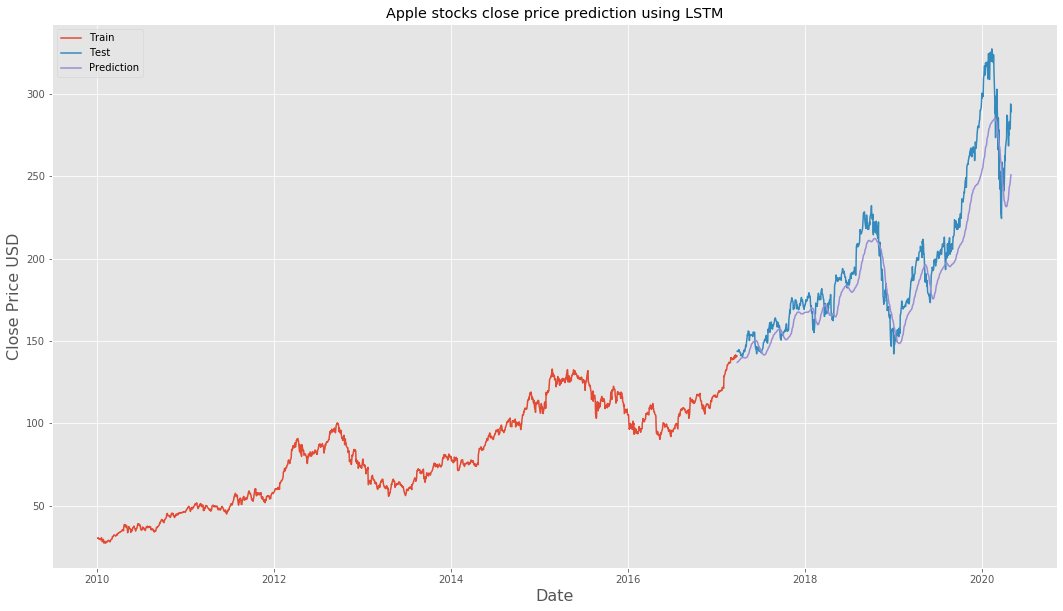

In [12]:
# Plot the data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
train = close_price[:train_length]
test = close_price[train_length:]
test['Prediction'] = preds

# Visualize the data
plt.figure(figsize=(18,10))
plt.title('Apple stocks close price prediction using LSTM')
plt.xlabel('Date',fontsize=16)
plt.ylabel("Close Price USD",fontsize=16)
plt.plot(train['Close'])
plt.plot(test[['Close','Prediction']])
plt.legend(['Train','Test','Prediction'])
plt.show()

In [13]:
# LSTM Evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RMSE=np.sqrt(np.mean(np.power((preds-y_test),2)))
print(RMSE)
MAE = mean_absolute_error(preds, y_test)
print(MAE)
MSE = mean_squared_error(preds, y_test)
print(MSE)
R2 = r2_score(preds,y_test)
print(R2)

17.565970607072238
13.698307780730419
308.56332336852586
0.7675572229636003


In [143]:
# Compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')
#'Adagrad'
# Fitting the model
model.fit(x_train, y_train, batch_size=32, epochs=50)


Epoch 1/1
1760/1760 [==============================] - 8s 5ms/step - loss: 0.0011


In [144]:
# Prediction on test data 

preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)


In [145]:
#  errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

RMSE=np.sqrt(np.mean(np.power((preds-y_test),2)))
print(RMSE)
MAE = mean_absolute_error(preds, y_test)
print(MAE)
MSE = mean_squared_error(preds, y_test)
print(MSE)

32.84819451512191
27.24307155120067
1079.0038829032853


In [152]:
# Compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')

# Fitting the model
model.fit(x_train, y_train, batch_size=32, epochs=1)


Epoch 1/1
1760/1760 [==============================] - 7s 4ms/step - loss: 0.0044


In [153]:
# Prediction on test data 

preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)

In [155]:
# errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

RMSE=np.sqrt(np.mean(np.power((preds-y_test),2)))
print(RMSE)
MAE = mean_absolute_error(preds, y_test)
print(MAE)
MSE = mean_squared_error(preds, y_test)
print(MSE)

19.302557509213887
14.532835309933393
372.58872639650946


In [43]:
# Compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')

# Fitting the model
model.fit(x_train, y_train, batch_size=32, epochs=1)

Epoch 1/1
1760/1760 [==============================] - 19s 11ms/step - loss: 1.5083e-04


In [44]:
#Prediction on test data 
preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)

In [45]:
#  errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

RMSE=np.sqrt(np.mean(np.power((preds-y_test),2)))
print(RMSE)
MAE = mean_absolute_error(preds, y_test)
print(MAE)
MSE = mean_squared_error(preds, y_test)
print(MSE)

7.584739338432707
5.124683869190705
57.52827083196861


In [178]:
# Compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')
#validation_split=0.3
# Fitting the model
model_fit = model.fit(x_train, y_train,batch_size=32 )

Epoch 1/50
1760/1760 [==============================] - 7s 4ms/step - loss: 0.0036
Epoch 2/50
1760/1760 [==============================] - 6s 3ms/step - loss: 5.8370e-04
Epoch 3/50
1760/1760 [==============================] - 6s 3ms/step - loss: 5.3827e-04
Epoch 4/50
1760/1760 [==============================] - 6s 3ms/step - loss: 5.1692e-04
Epoch 5/50
1760/1760 [==============================] - 6s 3ms/step - loss: 4.6914e-04
Epoch 6/50
1760/1760 [==============================] - 6s 3ms/step - loss: 4.8735e-04
Epoch 7/50
1760/1760 [==============================] - 6s 3ms/step - loss: 4.8303e-04
Epoch 8/50
1760/1760 [==============================] - 6s 3ms/step - loss: 4.2738e-04
Epoch 9/50
1760/1760 [==============================] - 6s 3ms/step - loss: 4.0602e-04
Epoch 10/50
1760/1760 [==============================] - 6s 3ms/step - loss: 3.9802e-04
Epoch 11/50
1760/1760 [==============================] - 6s 3ms/step - loss: 3.7991e-04
Epoch 12/50
1760/1760 [======================

In [179]:
#Prediction on test data 
preds = model.predict(x_test)
preds = scaler.inverse_transform(preds)

In [180]:
#  errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

RMSE=np.sqrt(np.mean(np.power((preds-y_test),2)))
print(RMSE)
MAE = mean_absolute_error(preds, y_test)
print(MAE)
MSE = mean_squared_error(preds, y_test)
print(MSE)

7.3858153428293445
5.550988867344
54.550268278373345


C:\Users\Vaishnavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


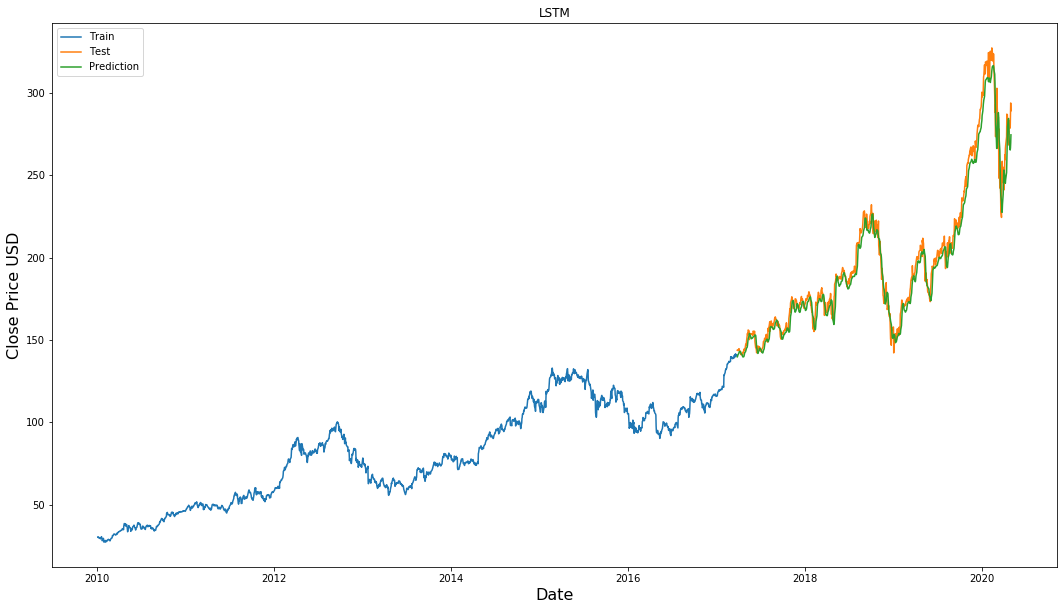

In [181]:
# Plot the data
train = close_price[:train_length]
test = close_price[train_length:]
test['Prediction'] = preds

# Visualize the data
plt.figure(figsize=(18,10))
plt.title('LSTM')
plt.xlabel('Date',fontsize=16)
plt.ylabel("Close Price USD",fontsize=16)
plt.plot(train['Close'])
plt.plot(test[['Close','Prediction']])
plt.legend(['Train','Test','Prediction'])
plt.show()